# **Homework Part 1 and 2**

In [61]:
from google.colab import drive
drive.mount('/content/drive')
import math
import statistics
import numpy as np
import scipy.stats as stats
import pandas as pd
from statsmodels.stats import weightstats as stests
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#the 2nd read option assume that the data file is rignt under your default google drive directory
# the sep-',' argument in the read statement should be used in some cases if ; does not work
data = pd.read_csv('drive/My Drive/Colab Notebooks/BUSHING DIAMETER 2 BATCHES.csv')
data  

In [63]:
mean1=np.mean(data['Batch 1'])
print(mean1)
median1=np.median(data['Batch 1'])
print(median1)
std1=np.std(data['Batch 1'])
print(std1)
min1=np.min(data['Batch 1'])
print(min1)
max1=np.max(data['Batch 1'])
print(max1)

1.00335999734
1.001000047
0.007636115737477588
0.985000014
1.024999976


In [64]:
mean2=np.mean(data['Batch 2'])
print(mean2)
median2=np.median(data['Batch 2'])
print(median2)
std2=np.std(data['Batch 2'])
print(std2)
min2=np.min(data['Batch 2'])
print(min2)
max2=np.max(data['Batch 2'])
print(max2)

1.00366000412
1.004999995
0.0071543258691635515
0.99000001
1.019000053


In [65]:
CI_1 = stats.t.interval(0.99, df=49, loc=mean1, scale=std1)
print(CI_1)
CI_2 = stats.t.interval(0.99, df=49, loc=mean2, scale=std2)
print(CI_2)

(0.982895573898468, 1.0238244207815321)
(0.9844867543869318, 1.022833253853068)


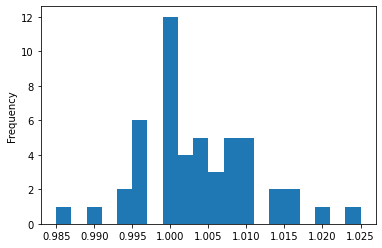

In [66]:
data['Batch 1'].plot(kind='hist', bins=20)
plt.show()

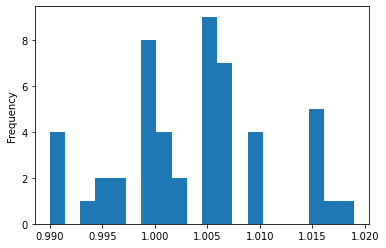

In [67]:
data['Batch 2'].plot(kind='hist', bins=20)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8e1f446e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8e1f44c910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8e1f446950>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8e1f452410>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8e1f452950>,
 'means': []}

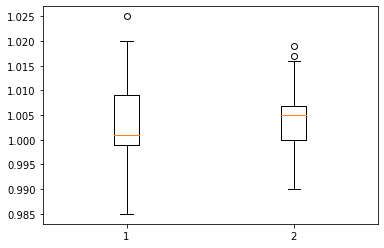

In [68]:
plt.boxplot([data['Batch 1'], data['Batch 2']])

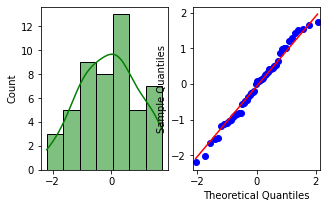

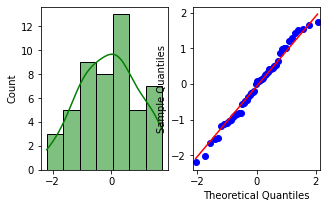

In [69]:
import seaborn as sns
import scipy.stats as sc
import statsmodels.graphics.gofplots as sm
sample_size = 50 
standard_norm = np.random.normal(size=sample_size)
heavy_tailed_norm = np.random.normal(loc=0, scale=2, size=sample_size)
skewed_norm = sc.skewnorm.rvs(a=5, size=sample_size)
skew_left_norm = sc.skewnorm.rvs(a=-5, size=sample_size)
fig, ax = plt.subplots(1, 2, figsize=(5, 3))
sns.histplot(standard_norm,kde=True, color ='green',ax=ax[0])
sm.ProbPlot(standard_norm).qqplot(line='s', ax=ax[1])

From the data shown above, it appears that both samples are from the same population. We will test whether this is true. H0 = both samples are from the same population. H1 = both samples are not from the same population (H0 is false).

In [71]:
#F test for variances of two populations
# the following function is user defined
# define a F test
Batch1 = data['Batch 1']
Batch2 = data['Batch 2']
def f_test(x,y):
  x=np.array(x)
  y=np.array(y)
  f=np.var(x,ddof=1)/np.var(y, ddof=1) # cal F test statistic
  dfn=x.size-1
  dfd=y.size-1
  p=1-stats.f.cdf(f,dfn, dfd) #find p-value of F test statistics
  return f, p
  

f_test(Batch1, Batch2)

(1.1392199163691206, 0.32501448085544293)

In [72]:
#two sample t-test 1: assume the variance is the same (default)

stats.ttest_ind(Batch1, Batch2, equal_var=True)

Ttest_indResult(statistic=-0.20069320812014202, pvalue=0.8413543932394967)

Since the p-value is greater than 0.05, we will fail to reject H0. Therefore, we conclude that both samples are from the same population.


# **Homework Part 4: Chapter 4 Montgomery 7th Edition – Exercise 4.11**


In [73]:
x = [13.3987, 13.3957, 13.3902, 13.4015, 13.4001, 13.3918, 13.3965, 13.3925, 13.3946, 13.4002]

H0 = mu equals 13.4 x 1000. H1 = mu does not equal 13.4 x 1000



In [74]:
meanx = np.mean(x)
print('mean of x =',meanx)
sigma = np.std(x, ddof = 1)
print('standard deviation of x =',sigma)

mean of x = 13.396180000000001
standard deviation of x = 0.003908622945915024


In [75]:
stats.ttest_1samp(x, 13.4)

Ttest_1sampResult(statistic=-3.0905771237069133, pvalue=0.012917430540578496)

Reject H0 because the p-value is less than 0.05.

In [76]:
m = len(x)-1
print(m)

9


In [77]:
stats.t.interval(0.99, df=m, loc=meanx, scale=sigma)

(13.383477618222212, 13.40888238177779)

The 99% two-sided confidence interval on
mean photoresist thickness is (13.3834, 13.4088).

(array([1., 1., 1., 1., 1., 1., 0., 1., 2., 1.]),
 array([13.3902 , 13.39133, 13.39246, 13.39359, 13.39472, 13.39585,
        13.39698, 13.39811, 13.39924, 13.40037, 13.4015 ]),
 <a list of 10 Patch objects>)

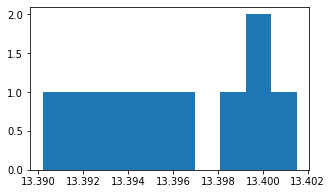

In [81]:
a = np.array(x)
fig, ax = plt.subplots(figsize = (5,3))
ax.hist(a, bins = 10)

It does not seem reasonable to assume normality because the sample size is less than 30. It is difficult to get a good description of data with less than 30 observations.